In [1]:
import os 
import pandas as pd
import numpy as np
import csv
#!pip install tqdm
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import librosa
import IPython.display as ipd
import librosa.display
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy import signal

In [2]:
os.chdir(r"G:\Case studies\TensorFlow Speech Recognition\Data\speech-train\train\audio")

In [3]:
folders = os.listdir()

In [41]:
# find label with respect to file name
names = []
label = []
for n in tqdm(folders):
    path = os.path.join(r"G:\Case studies\TensorFlow Speech Recognition\Data\speech-train\train\audio" , n)
    file_names = os.listdir(path)
    count = 0
    
    for i in file_names:
        if i.endswith('.wav'):
            names.append(n+'/'+i)
            label.append(n)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:05<00:00,  6.08it/s]


In [42]:
# create dataframe

with open('data1.csv' , 'w') as csvfile:
    csvwriter = csv.writer(csvfile) 

    header = ('file_name','label')
    csvwriter.writerow(header)
    
data = pd.read_csv('data1.csv')

In [43]:
# fill with file name and label
data['file_name'] = names
data['label'] = label

print(data.shape)
data.head()

(64727, 2)


,file_name,label
0,bed/00176480_nohash_0.wav,bed
1,bed/004ae714_nohash_0.wav,bed
2,bed/004ae714_nohash_1.wav,bed
3,bed/00f0204f_nohash_0.wav,bed
4,bed/00f0204f_nohash_1.wav,bed


In [4]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(64727, 2)


,file_name,label
0,bed/00176480_nohash_0.wav,bed
1,bed/004ae714_nohash_0.wav,bed
2,bed/004ae714_nohash_1.wav,bed
3,bed/00f0204f_nohash_0.wav,bed
4,bed/00f0204f_nohash_1.wav,bed


# EDA

In [146]:
def plot(column_name , title):
    #get unique_values of each categories
    dic = Counter(data[column_name].values)
    #sort in deccending order by values
    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    column_list = []


    #get name of sorted dic
    for name in dic:
        column_list.append(name[0])

    plt.figure(figsize = (16,6))
    ax = sns.countplot(x = column_name ,  data = data , order = column_list, dodge = False)

    h,l = ax.get_legend_handles_labels()
    ax.legend(h ,column_list,bbox_to_anchor=(1.05, 1) ,loc = 'upper left')
    plt.setp(ax.get_xticklabels() , rotation = 90 )
    plt.title('count plot of {}'.format(title))
    plt.show()
    return dic

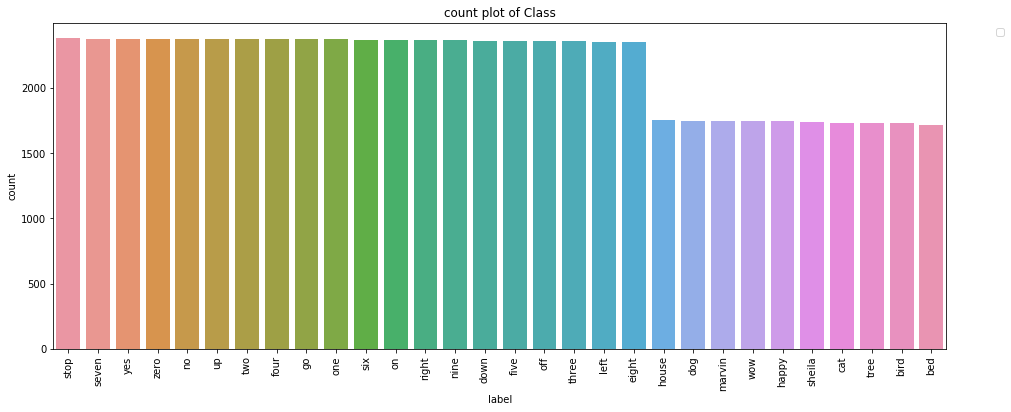

In [148]:
dic = plot('label' , 'Class')

In [67]:
print(dict(Counter(data['label'])))

{'bed': 1713, 'bird': 1731, 'cat': 1733, 'dog': 1746, 'down': 2359, 'eight': 2352, 'five': 2357, 'four': 2372, 'go': 2372, 'happy': 1742, 'house': 1750, 'left': 2353, 'marvin': 1746, 'nine': 2364, 'no': 2375, 'off': 2357, 'on': 2367, 'one': 2370, 'right': 2367, 'seven': 2377, 'sheila': 1734, 'six': 2369, 'stop': 2380, 'three': 2356, 'tree': 1733, 'two': 2373, 'up': 2375, 'wow': 1745, 'yes': 2377, 'zero': 2376, '_background_noise_': 6}


# Observation
* Total we have 30 class.
* As we see 10 class have less count outof 30.
* 'stop', 'seven', 'yes', 'zero', 'no', 'up', 'two', 'four', 'go', 'one', 'six', 'on', 'right', 'nine', 'down', 'five', 'off', 'three', 'left', 'eight' (Total 20 class) which have count between 2300-2400. 
* 'house', 'dog', 'marvin', 'wow', 'happy', 'sheila', 'cat', 'tree', 'bird', 'bed'(total 10 class) have count between 1700-1800.

# Find duration of all files

In [5]:
clip_len = []
for file in tqdm(data['file_name'].values):
    clip_len.append(librosa.get_duration(filename=file))

100%|████████████████████████████████████████████████████████████████████████████| 64727/64727 [15:24<00:00, 70.05it/s]


In [6]:
data['clip_len'] = clip_len
data.to_csv('data_final.csv')

In [24]:
# last 6 are noise clip
clip_len[-6:]

[95.183125, 61.8056875, 61.253875, 60.0, 61.1555, 60.0]

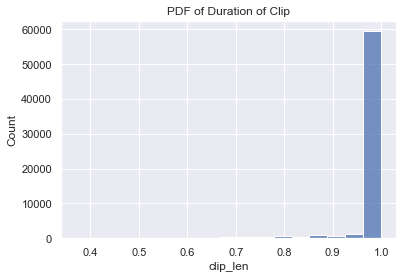

In [29]:
# not calculate last 6 because last clips are background noise
# length of backgroung noise are higher than 1 sec so they 6 points corrupt histogram
sns.set_theme()
sns.histplot(data=data[:-6], x='clip_len')
plt.title('PDF of {}'.format("Duration of Clip"))
plt.show()

#  Observation
* Most clip duration is 1 sec but few clip have < 1 sec duration

In [22]:
for i in range(1,15,1):
    print("{}th Percentile of age : {}".format(i,np.percentile(clip_len,i)))
    if i == 100:
        print('='*30)
        print()
        print('='*30)
        for i in range(90,101):
            print("{}th Percentile of age : {}".format(i,np.percentile(clip_len,i)))

1th Percentile of age : 0.6826875
2th Percentile of age : 0.7430625
3th Percentile of age : 0.7895
4th Percentile of age : 0.8359375
5th Percentile of age : 0.8823749999999999
6th Percentile of age : 0.896
7th Percentile of age : 0.9288125
8th Percentile of age : 0.9386875
9th Percentile of age : 0.981375
10th Percentile of age : 1.0
11th Percentile of age : 1.0
12th Percentile of age : 1.0
13th Percentile of age : 1.0
14th Percentile of age : 1.0


# Observation
* 10% clip have < 1 sec duration.

# Plot signals

In [134]:
def plot_signals(signals):
    fig , ax = plt.subplots(nrows = 6 , ncols = 5 , figsize = (20,15))
    i = 0
    for x in range(6):
        for y in range(5):
            ax[x,y].set_title(list(signals.keys())[i])
            ax[x,y].plot(list(signals.values())[i])
            ax[x,y].get_xaxis().set_visible(False)
            ax[x,y].get_yaxis().set_visible(False)
            i += 1

In [115]:
# store all signal in dic
signals = {}
labels = np.unique(data['label'])

# get all signal array except backgroud noise
for name in labels[1:]:
    file = data[data['label'] == name ][:1]

    signal , rate = librosa.load(file['file_name'].values[0])

    signals[name] = signal

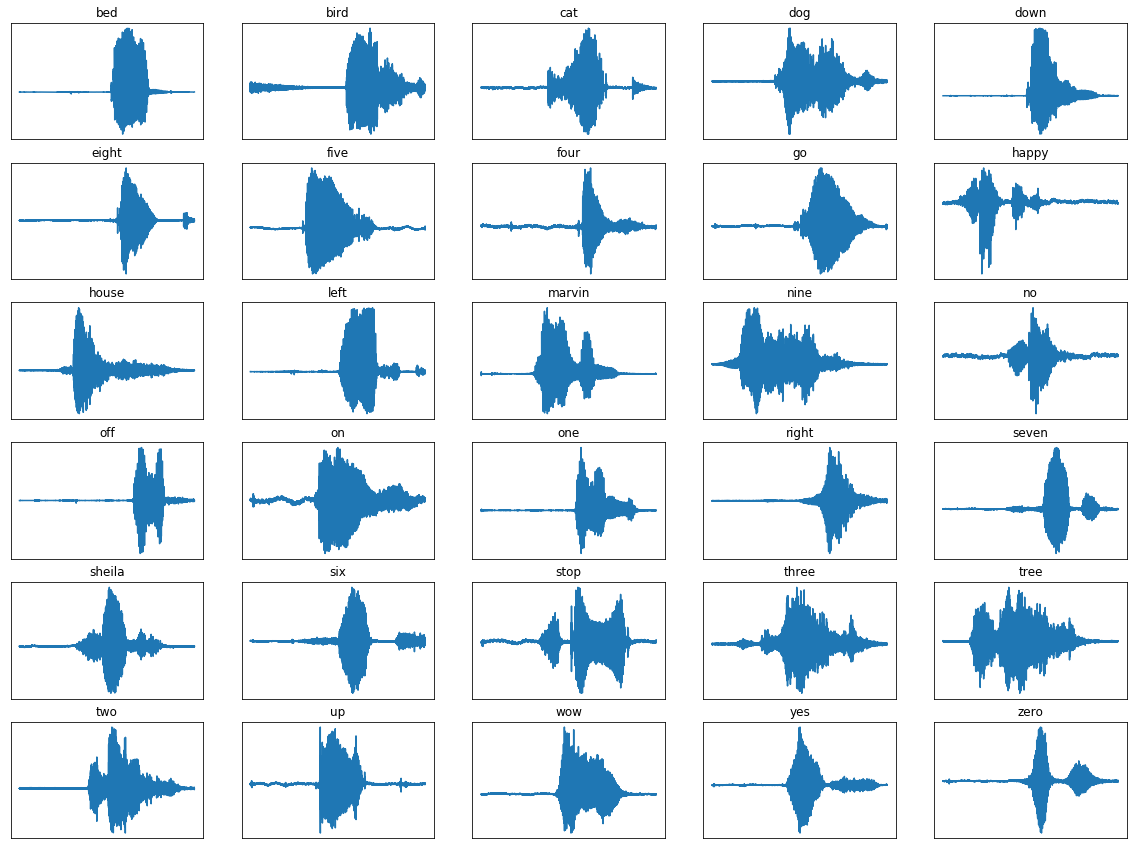

In [131]:
plot_signals(signals)
plt.show()

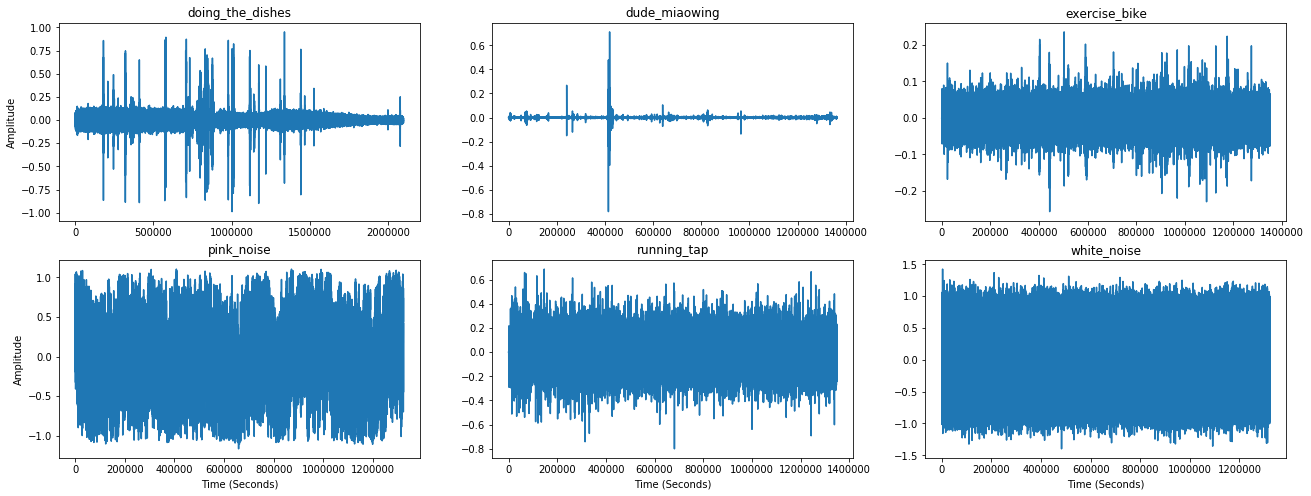

In [157]:
''' noise signals '''

noise = data[-6:]
noise_signals = {}
title = []
for name in noise['file_name'].values:
    title.append(name.split('/')[1].split('.')[0])

    signal , rate = librosa.load(name)

    noise_signals[name] = signal

''' plot noise signals '''

fig , ax = plt.subplots(nrows = 2 , ncols = 3 , figsize = (22,8))
i = 0
for x in range(2):
    for y in range(3):
        ax[x,y].set_title(list(title)[i])
        ax[x,y].plot(list(noise_signals.values())[i])
        if x == 0 and y == 0 or x == 1 and y == 0:
            ax[x,y].set_ylabel('Amplitude')
        if x == 1:
                ax[x,y].set_xlabel('Time (Seconds)')            
        i += 1

# Observation
* noise file are more than 1 sec.

# try with different sample_rate for dimensionality reduction

In [169]:
samples , sample_rate = librosa.load('eight/bbb2eb5b_nohash_0.wav' , sr=16000)
print(sample_rate)

ipd.Audio(samples, rate=sample_rate)

16000


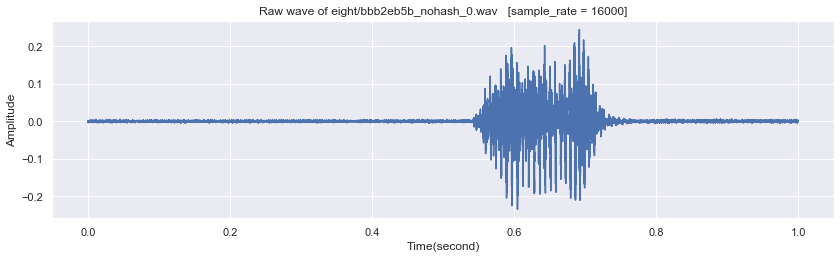

In [33]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(211)

ax.set_title('Raw wave of '+ 'eight/bbb2eb5b_nohash_0.wav'+ '   [sample_rate = 16000]')
ax.set_xlabel('Time(second)')
ax.set_ylabel('Amplitude')
ax.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
plt.show()

In [34]:
# reduce sample_rate to 8000
# it reduce dimensonality 
# we reduce the sample_rate but it is not
samples = librosa.resample(samples,sample_rate , 8000)
ipd.Audio(samples , rate = 8000)

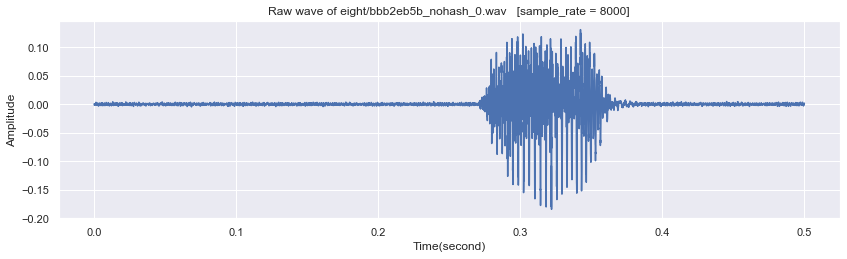

In [35]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(211)

ax.set_title('Raw wave of '+ 'eight/bbb2eb5b_nohash_0.wav' + '   [sample_rate = 8000]')
ax.set_xlabel('Time(second)')
ax.set_ylabel('Amplitude')
ax.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)
plt.show()

# Observation
* Here we listen both audio 16khz and 8khz and not found and difference.

# Conclusion
* Dataset is little imbalanced.First we try we as it is than we can try with down sampling.
* 10 % data point's duration or length are < 1. For make all length equal we use zero padding.
* for dimensonality reduction we can use 8000 hz.
* for argumentation we use noise data and other argumentation techniques.

# Data Preprocessing

In [78]:
# get all raw data
raw_data = []
for i in tqdm(data['file_name']):
    signal , rate = librosa.load(i , sr=16000)
    raw_data.append(signal)

100%|████████████████████████████████████████████████████████████████████████████| 64727/64727 [15:35<00:00, 69.21it/s]


In [79]:
data['raw_data'] = raw_data

In [80]:
data.head()

,file_name,label,clip_len,raw_data
0,bed/00176480_nohash_0.wav,bed,1.000000,"[9.1552734e-05, 3.0517578e-05, 0.00018310547, ..."
1,bed/004ae714_nohash_0.wav,bed,1.000000,"[-0.003326416, -0.004547119, -0.0043945312, -0..."
2,bed/004ae714_nohash_1.wav,bed,0.928813,"[-0.0025024414, -0.002105713, -0.001739502, -0..."
3,bed/00f0204f_nohash_0.wav,bed,1.000000,"[-0.00024414062, -0.00033569336, -0.0003356933..."
4,bed/00f0204f_nohash_1.wav,bed,1.000000,"[-0.00036621094, -0.00045776367, -0.0004577636..."


In [87]:
''' padding - make all file same length(16000) '''
# if len of audio is < 16000 we add zeros.
# if len of audio is > 16000 we truncate.

pad_seq = []
for i in tqdm(data['raw_data']):
    while len(i) < 16000:
        i = np.append(i,0)
    if len(i) > 16000:
        i = i[:16000]
    pad_seq.append(i)

100%|████████████████████████████████████████████████████████████████████████████| 64727/64727 [15:58<00:00, 67.55it/s]


In [129]:
#data['pad_seq'] = pad_seq
data.to_csv('data_final.csv')

# plot mel-spectrogram

In [172]:
spec = librosa.feature.melspectrogram(y = data['pad_seq'].values[0], sr = 16000, n_mels = 64)
spec = librosa.power_to_db(spec, ref=np.max)

In [173]:
spec.shape

(64, 32)

In [175]:
ipd.Audio(data['pad_seq'].values[0] , rate = 16000)

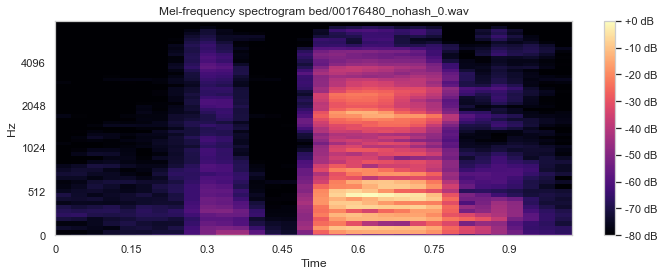

In [174]:
plt.figure(figsize=(10,4))
librosa.display.specshow(spec , x_axis='time', y_axis='mel',sr=16000,fmax=8000)
plt.colorbar(format = '%+2.0f dB' )
plt.title('Mel-frequency spectrogram bed/00176480_nohash_0.wav')
plt.tight_layout()

In [157]:
def mel_spectrogram(raw_data):
    
    spec = librosa.feature.melspectrogram(raw_data, sr = 16000, n_mels = 64)
    log_spec = librosa.power_to_db(spec, ref=np.max)
    return log_spec

In [158]:
spectrogram = []
for i in tqdm(data['raw_data'].values):
    spec = mel_spectrogram(i)
    spectrogram.append(spec)

100%|████████████████████████████████████████████████████████████████████████████| 64727/64727 [11:53<00:00, 90.71it/s]


In [159]:
data['spectrogram'] = spectrogram

In [161]:
data = data.drop('file_name',axis = 1)
data.to_csv('data_final.csv')

In [177]:
data.head(3)

,label,clip_len,raw_data,pad_seq,spectrogram
0,bed,1.000000,"[9.1552734e-05, 3.0517578e-05, 0.00018310547, ...","[9.1552734e-05, 3.0517578e-05, 0.00018310547, ...","[[-77.87311, -75.90468, -74.29295, -73.0435, -..."
1,bed,1.000000,"[-0.003326416, -0.004547119, -0.0043945312, -0...","[-0.003326416, -0.004547119, -0.0043945312, -0...","[[-27.739023, -28.297258, -29.319103, -31.3030..."
2,bed,0.928813,"[-0.0025024414, -0.002105713, -0.001739502, -0...","[-0.00250244140625, -0.002105712890625, -0.001...","[[-23.030268, -22.656105, -21.973421, -20.9690..."
